In [2]:
from src.source2 import *
import matplotlib.pyplot as plt
from itertools import product
from collections import Counter
import numpy as np
import numpy.linalg

In [3]:
start = np.array([
   [ 1, 2 ],
   [ 1, 2 ]
], dtype='int64')


def next_m(matrix):
    n = matrix.shape[0]
    res = np.zeros((n*2, n*2), dtype=matrix.dtype)
    res[:n, :n] = matrix
    res[n-1, n-1] -= 1
    res[n:, n:] = matrix
    res[n, n] -= 1
    
    res[n-1, n] = res[n, n-1] = 1
    return res


x2 = next_m(start)
x3 = next_m(x2)

x2_0 = x2.copy()
x3_0 = x3.copy()

x2_0[0, 0] = 0
x3_0[0, 0] = 0

In [4]:
serp = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 1]
])

serp2 = serp.copy()
serp2[0, 0] = 0
serp2[4, 4] = 0
serp2[8, 8] = 0

In [5]:
serp2

array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [6]:
Ring13.<t> = QQ.extension(x^2 - 13)

In [7]:
X2   = matrix(Ring13, x2)
X2_0 = matrix(Ring13, x2_0)

X3   = matrix(Ring13, x3)
X3_0 = matrix(Ring13, x3_0)

S    = matrix(Ring13, serp)
S2   = matrix(Ring13, serp2)

In [18]:
((S2)).eigenvectors_left()

[(-2,
  [
  (0, 1, -1, 1, 0, -1, 1, -1, 0)
  ],
  1),
 (-0.732050807568878?,
  [(1, -0.366025403784439?, -0.366025403784439?, -0.366025403784439?, 1, -0.366025403784439?, -0.366025403784439?, -0.366025403784439?, 1)],
  1),
 (2.732050807568878?,
  [(1, 1.366025403784439?, 1.366025403784439?, 1.366025403784439?, 1, 1.366025403784439?, 1.366025403784439?, 1.366025403784439?, 1)],
  1),
 (-1.532088886237957?,
  [(1, 0, -1.532088886237957?, 1.347296355333861?, -1.532088886237957?, 1, -1.347296355333861?, 0.5320888862379561?, 0.5320888862379561?),
   (0, 1, -1, 0.5320888862379561?, -1.347296355333861?, 1.532088886237957?, -1.532088886237957?, -0.5320888862379561?, 1.347296355333861?)],
  2),
 (-0.3472963553338607?,
  [(1, 0, -0.3472963553338607?, -0.879385241571817?, -0.3472963553338607?, 1, 0.879385241571817?, -0.652703644666140?, -0.652703644666140?),
   (0, 1, -1, -0.652703644666140?, 0.879385241571817?, 0.3472963553338607?, -0.3472963553338607?, 0.652703644666140?, -0.879385241571817?)]

In [23]:
Ring_sraka.<t2> = QQ.extension(x^3 - 3*x - 1)
Ring_double_sraka.<t3> = Ring_sraka.extension(x^2 - 3)
S2_2 = matrix(Ring_double_sraka, S2)
S2_2.eigenvalues()

[-2, t3 + 1, -t3 + 1, t2, t2, -t2^2 + 2, -t2^2 + 2, t2^2 - t2 - 2, t2^2 - t2 - 2]

In [27]:
S

[1 1 1 0 0 0 0 0 0]
[1 0 1 0 0 0 0 1 0]
[1 1 0 1 0 0 0 0 0]
[0 0 1 0 1 1 0 0 0]
[0 0 0 1 1 1 0 0 0]
[0 0 0 1 1 0 1 0 0]
[0 0 0 0 0 1 0 1 1]
[0 1 0 0 0 0 1 0 1]
[0 0 0 0 0 0 1 1 1]

In [14]:
S2.charpoly()

x^9 - 12*x^7 - 6*x^6 + 45*x^5 + 42*x^4 - 45*x^3 - 72*x^2 - 30*x - 4

In [16]:
(-1 - 3 * x + x^3).roots()

[(-1/2*(I*sqrt(3) + 1)*(1/2*I*sqrt(3) + 1/2)^(1/3) - 1/2*(-I*sqrt(3) + 1)/(1/2*I*sqrt(3) + 1/2)^(1/3),
  1),
 (-1/2*(1/2*I*sqrt(3) + 1/2)^(1/3)*(-I*sqrt(3) + 1) - 1/2*(I*sqrt(3) + 1)/(1/2*I*sqrt(3) + 1/2)^(1/3),
  1),
 ((1/2*I*sqrt(3) + 1/2)^(1/3) + 1/(1/2*I*sqrt(3) + 1/2)^(1/3), 1)]

In [25]:
3 ^ 25

847288609443

In [55]:
k = 2
(S^k - S2^k).characteristic_polynomial()

x^9 - 3*x^8 - 3*x^7 + 11*x^6 + 6*x^5 - 12*x^4 - 8*x^3

In [73]:
k = 3
X3^k - X3_0^k

[5 4 2 0 0 0 0 0]
[2 2 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]

In [ ]:
for n in [1..10] do
    M  := [
        [1,2,0,0],
        [1,1,1,0],
        [0,1,0,2],
        [0,0,1,2]
    ];; 
    
    v0 := [1,0,0,0];;
    Mn := M^0;; 
    vn := v0;;
        
    for i in [1..n] do 
        vn := 3^i * v0 + M*vn; 
    od; 
    
    Print([3,6,6,12]*vn,", ");
od;

In [30]:
def next_s(matrix):
    n = matrix.shape[0]
    res = np.zeros((3*n, 3*n), dtype='int64')
    res[:n, :n] = matrix
    res[n:2*n, n:2*n] = matrix
    res[2*n:3*n, 2*n: 3*n] = matrix
    
    # connecions between 1st and 2nd
    res[n-1, n-1] -= 1
    res[n, n] -= 1                 
    res[n, n-1] += 1
    res[n-1, n] += 1
    
    # connections between 2nd and 3rd
    res[2*n-1, 2*n-1] -= 1
    res[2*n, 2*n] -= 1
    res[2*n-1, 2*n] += 1
    res[2*n, 2*n-1] += 1
    
    # connection between 1st and 3rd
    res[n//2, n//2] -= 1
    res[2*n + n//2, 2*n + n//2] -= 1
    res[n//2, 2*n + n//2] += 1
    res[2*n + n//2, n//2] += 1
    return res

test = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

next_s(test) == serp

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

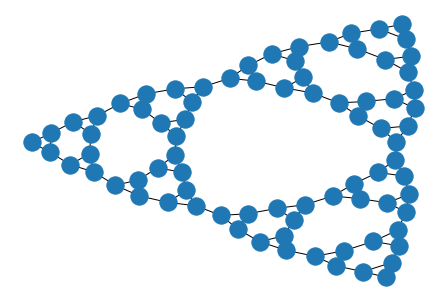

In [50]:
%matplotlib inline
import networkx as nx

SS2 = next_s(test)
SS3 = next_s(SS2)
SS4 = next_s(SS3)
SS5 = next_s(SS4)
graph = nx.from_numpy_array(SS4)
nx.draw_kamada_kawai(graph)

In [73]:
ImagQQ.<tmp> = QQ.extension(x^2 - 13)

SS4 = matrix(ImagQQ, SS4)
SS3 = matrix(ImagQQ, SS3)
SS2 = matrix(ImagQQ, SS2)

SS2.charpoly().factor()

(x - 3) * (x + 2) * (x - 1/2*tmp - 1/2)^2 * (x + 1/2*tmp - 1/2)^2 * x^3

In [74]:
SS3.charpoly().factor()

(x - 3) * (x - 1/2*tmp - 1/2)^3 * (x + 1/2*tmp - 1/2)^3 * (x + 2)^4 * x^6 * (x^2 - x - 1) * (x^2 - x - 1/2*tmp - 7/2)^2 * (x^2 - x + 1/2*tmp - 7/2)^2

In [75]:
SS4.charpoly().factor()

(x - 3) * (x - 1/2*tmp - 1/2)^6 * (x + 1/2*tmp - 1/2)^6 * (x + 2)^13 * x^15 * (x^2 - x - 1/2*tmp - 7/2)^3 * (x^2 - x + 1/2*tmp - 7/2)^3 * (x^2 - x - 1)^4 * (x^4 - 2*x^3 - 6*x^2 + 7*x + 11) * (x^4 - 2*x^3 - 6*x^2 + 7*x - 1/2*tmp + 17/2)^2 * (x^4 - 2*x^3 - 6*x^2 + 7*x + 1/2*tmp + 17/2)^2